<a href="https://colab.research.google.com/github/khairillkmn/naivebayes/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('DataMhs.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [3]:
y

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1])

In [4]:
X

array([[19. ,  3.3],
       [20. ,  3.5],
       [19. ,  2.9],
       [21. ,  3. ],
       [19. ,  3.1],
       [20. ,  2.7],
       [19. ,  3.7],
       [19. ,  2.6],
       [20. ,  3.1],
       [19. ,  2.8],
       [20. ,  3.2],
       [19. ,  3.8],
       [20. ,  2.9],
       [21. ,  3.2],
       [20. ,  3.5],
       [19. ,  3.2],
       [21. ,  2.6],
       [22. ,  3.7],
       [19. ,  3.2],
       [19. ,  2.9],
       [20. ,  3.4],
       [19. ,  2.7],
       [20. ,  3.4],
       [19. ,  3.5],
       [19. ,  2.8],
       [20. ,  3. ],
       [22. ,  3.8],
       [20. ,  3.9],
       [21. ,  2.9],
       [20. ,  3.1]])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
X_train

array([[22. ,  3.7],
       [20. ,  3.4],
       [20. ,  2.7],
       [21. ,  2.6],
       [20. ,  3.1],
       [20. ,  3.5],
       [19. ,  3.5],
       [20. ,  3.4],
       [20. ,  3.5],
       [20. ,  3.1],
       [19. ,  3.7],
       [19. ,  3.1],
       [19. ,  3.2],
       [19. ,  2.9],
       [19. ,  2.8],
       [19. ,  2.6],
       [20. ,  3. ],
       [21. ,  3. ],
       [19. ,  3.3],
       [19. ,  2.7],
       [19. ,  3.2],
       [20. ,  2.9]])

In [7]:
y_test

array([0, 0, 1, 1, 1, 0, 1, 1])

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
X_train

array([[ 2.81271975,  1.71040408],
       [ 0.33752637,  0.80731073],
       [ 0.33752637, -1.2999071 ],
       [ 1.57512306, -1.60093822],
       [ 0.33752637, -0.09578263],
       [ 0.33752637,  1.10834184],
       [-0.90007032,  1.10834184],
       [ 0.33752637,  0.80731073],
       [ 0.33752637,  1.10834184],
       [ 0.33752637, -0.09578263],
       [-0.90007032,  1.71040408],
       [-0.90007032, -0.09578263],
       [-0.90007032,  0.20524849],
       [-0.90007032, -0.69784486],
       [-0.90007032, -0.99887598],
       [-0.90007032, -1.60093822],
       [ 0.33752637, -0.39681375],
       [ 1.57512306, -0.39681375],
       [-0.90007032,  0.50627961],
       [-0.90007032, -1.2999071 ],
       [-0.90007032,  0.20524849],
       [ 0.33752637, -0.69784486]])

In [10]:
y_test

array([0, 0, 1, 1, 1, 0, 1, 1])

In [11]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
y_pred

array([0, 1, 1, 1, 1, 0, 1, 1])

In [14]:
y_test

array([0, 0, 1, 1, 1, 0, 1, 1])

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2 1]
 [0 5]]


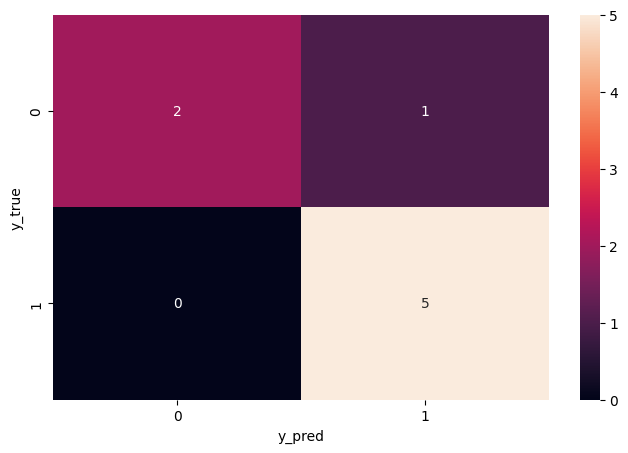

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [17]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.83      1.00      0.91         5

    accuracy                           0.88         8
   macro avg       0.92      0.83      0.85         8
weighted avg       0.90      0.88      0.87         8



<ipython-input-18-d8263a4527f0>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


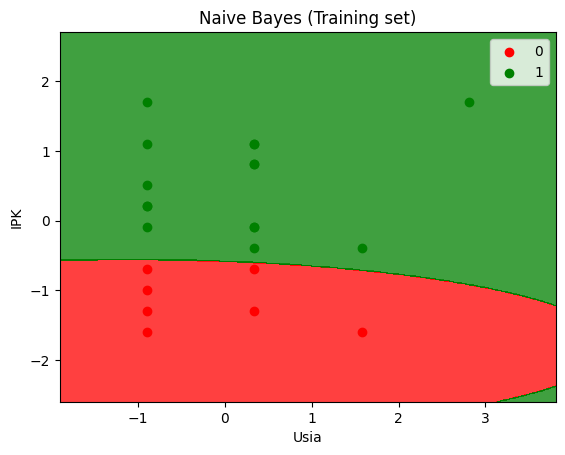

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Usia')
plt.ylabel('IPK')
plt.legend()
plt.show()

<ipython-input-19-647bbff0d84d>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


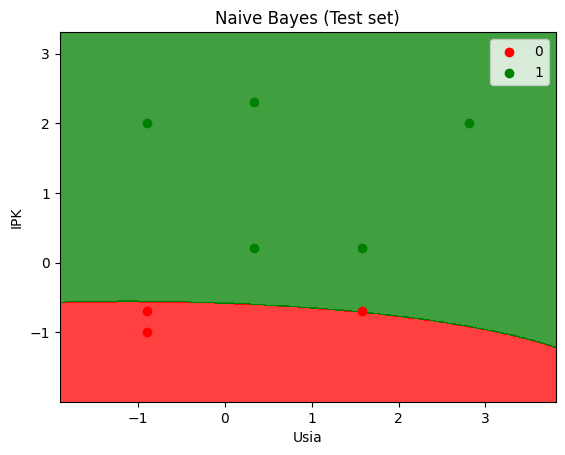

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Usia')
plt.ylabel('IPK')
plt.legend()
plt.show()